In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>

In [ ]:
stop = stopwords.words('english')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
trueNews = pd.read_csv('/content/gdrive/MyDrive/Canis/DataSet_Misinfo_TRUE.csv')
fakeNews = pd.read_csv('/content/gdrive/MyDrive/Canis/DataSet_Misinfo_FAKE.csv')
russianNews =  pd.read_csv('/content/gdrive/MyDrive/Canis/EXTRA_RussianPropagandaSubset.csv')

In [ ]:
trueNews['wordcount']=trueNews['text'].apply(lambda x: len(str(x).split()))
fakeNews['wordcount']=fakeNews['text'].apply(lambda x: len(str(x).split()))

In [ ]:
print("Average, Minimum and Maximum of lentgh in True News are {0}, {1}, {2}".format(trueNews['wordcount'].mean(),trueNews['wordcount'].min(),trueNews['wordcount'].max()))

Average, Minimum and Maximum of lentgh in True News are 533.143502501787, 1, 14641


In [ ]:
print("Average, Minimum and Maximum of lentgh in Fake News are {0}, {1}, {2}".format(fakeNews['wordcount'].mean(),fakeNews['wordcount'].min(),fakeNews['wordcount'].max()))

Average, Minimum and Maximum of lentgh in Fake News are 436.3785115255946, 1, 24234


In [ ]:
fakeNews[fakeNews['wordcount']==1]

,Unnamed: 0,text,wordcount
9358,9358,https://100percentfedup.com/served-roy-moore-v...,1
11115,11117,Enjoy:,1
11243,11251,https://www.youtube.com/watch?v=cJZFepSvxzM,1
11273,11286,https://www.youtube.com/watch?v=-7Tn4gi_Os8,1
11275,11288,https://www.youtube.com/watch?time_continue=2&...,1
...,...,...,...
30664,31383,baldegar,1
31198,31922,Brilliant!,1
31952,32683,Innocent...,1
32618,33357,Trending,1


In [ ]:
trueNews[trueNews['wordcount']==1]

,Unnamed: 0,text,wordcount
2922,2922,NaN,1
3488,3488,NaN,1
3782,3782,NaN,1
4358,4358,NaN,1
4465,4465,NaN,1
5290,5290,NaN,1
5588,5588,NaN,1
5761,5761,NaN,1
5784,5784,NaN,1
6026,6026,NaN,1


In [ ]:
len(trueNews[trueNews['wordcount']==1])

33

<Axes: >

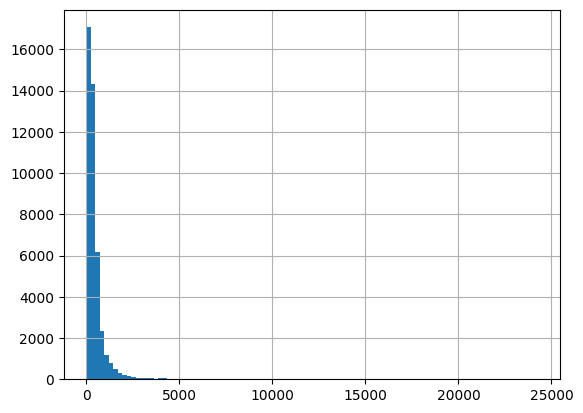

In [ ]:
fakeNews['wordcount'].hist(bins=100)

<Axes: >

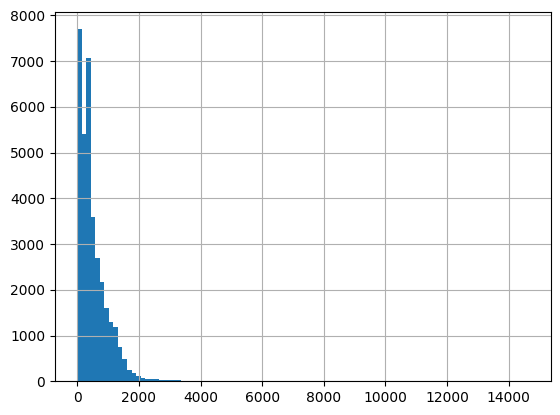

In [ ]:
trueNews['wordcount'].hist(bins=100)

In [ ]:

trueNewsVocab = dict()
fakeNewsVocab = dict()

def word_count(sentence,counts): 
    words = sentence.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts



In [ ]:
trueNews['text'].apply(lambda x: word_count(str(x),trueNewsVocab))
fakeNews['text'].apply(lambda x: word_count(str(x),fakeNewsVocab))

0        {'Donald': 23678, 'Trump': 82956, 'just': 3084...
1        {'Donald': 23678, 'Trump': 82956, 'just': 3084...
2        {'Donald': 23678, 'Trump': 82956, 'just': 3084...
3        {'Donald': 23678, 'Trump': 82956, 'just': 3084...
4        {'Donald': 23678, 'Trump': 82956, 'just': 3084...
                               ...                        
43637    {'Donald': 23678, 'Trump': 82956, 'just': 3084...
43638    {'Donald': 23678, 'Trump': 82956, 'just': 3084...
43639    {'Donald': 23678, 'Trump': 82956, 'just': 3084...
43640    {'Donald': 23678, 'Trump': 82956, 'just': 3084...
43641    {'Donald': 23678, 'Trump': 82956, 'just': 3084...
Name: text, Length: 43642, dtype: object

In [ ]:
 sorted(trueNewsVocab.items(), key=lambda x:x[1], reverse=True)[:10]

[('the', 969533),
 ('to', 522006),
 ('of', 474161),
 ('a', 438146),
 ('and', 410873),
 ('in', 364447),
 ('that', 219707),
 ('on', 190099),
 ('for', 171158),
 ('is', 142404)]

In [ ]:
sorted(fakeNewsVocab.items(), key=lambda x:x[1], reverse=True)[:10]

[('the', 955905),
 ('to', 528947),
 ('of', 481833),
 ('and', 428417),
 ('a', 371387),
 ('in', 304273),
 ('that', 249811),
 ('is', 214709),
 ('for', 163025),
 ('on', 137681)]

In [ ]:
def cleanText(text):
  text = text.lower()
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
  text = " ".join([word for word in text.split() if word not in (stop)])
  return text

In [ ]:
trueNews['cleantext']=trueNews['text'].apply(lambda x: cleanText(str(x)))
fakeNews['cleantext']=fakeNews['text'].apply(lambda x: cleanText(str(x)))

In [ ]:
trueNews

,Unnamed: 0,text,wordcount,cleantext
0,0,The head of a conservative Republican faction ...,746,head conservative republican faction us congre...
1,1,Transgender people will be allowed for the fir...,396,transgender people allowed first time enlist u...
2,2,The special counsel investigation of links bet...,454,special counsel investigation links russia pre...
3,3,Trump campaign adviser George Papadopoulos tol...,373,trump campaign adviser george papadopoulos tol...
4,4,President Donald Trump called on the U.S. Post...,849,president donald trump called us postal servic...
...,...,...,...,...
34970,34970,Most conservatives who oppose marriage equalit...,288,conservatives oppose marriage equality cite bi...
34971,34971,The freshman senator from Georgia quoted scrip...,370,freshman senator georgia quoted scripture righ...
34972,34972,The State Department told the Republican Natio...,642,state department told republican national comm...
34973,34973,"ADDIS ABABA, Ethiopia —President Obama convene...",1120,addis ababa ethiopia president obama convened ...


In [ ]:
trueNews['wordcountclean']=trueNews['cleantext'].apply(lambda x: len(str(x).split()))
fakeNews['wordcountclean']=fakeNews['cleantext'].apply(lambda x: len(str(x).split()))

In [ ]:
print("Average, Minimum and Maximum of lentgh in True News are {0}, {1}, {2}".format(trueNews['wordcountclean'].mean(),trueNews['wordcountclean'].min(),trueNews['wordcountclean'].max()))
print("Average, Minimum and Maximum of lentgh in Fake News are {0}, {1}, {2}".format(fakeNews['wordcountclean'].mean(),fakeNews['wordcountclean'].min(),fakeNews['wordcountclean'].max()))

Average, Minimum and Maximum of lentgh in True News are 307.67356683345247, 0, 7763
Average, Minimum and Maximum of lentgh in Fake News are 243.2948535814124, 0, 12438


<Axes: >

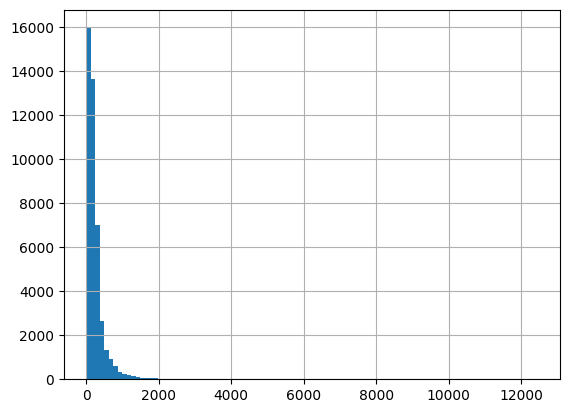

In [ ]:
fakeNews['wordcountclean'].hist(bins=100)

<Axes: >

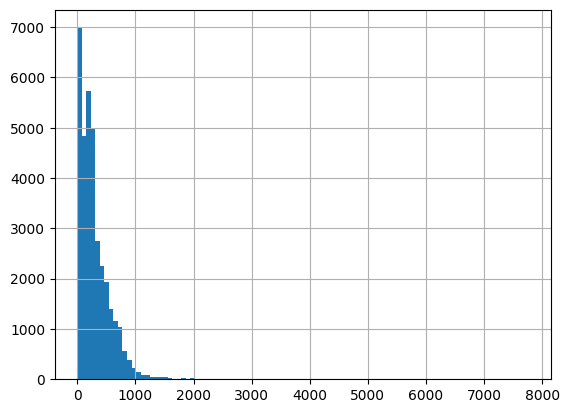

In [ ]:
trueNews['wordcountclean'].hist(bins=100)

In [ ]:
trueNewsVocabClean = dict()
fakeNewsVocabClean = dict()
trueNews['cleantext'].apply(lambda x: word_count(str(x),trueNewsVocabClean))
fakeNews['cleantext'].apply(lambda x: word_count(str(x),fakeNewsVocabClean))


0        {'donald': 24043, 'trump': 95820, 'wish': 1168...
1        {'donald': 24043, 'trump': 95820, 'wish': 1168...
2        {'donald': 24043, 'trump': 95820, 'wish': 1168...
3        {'donald': 24043, 'trump': 95820, 'wish': 1168...
4        {'donald': 24043, 'trump': 95820, 'wish': 1168...
                               ...                        
43637    {'donald': 24043, 'trump': 95820, 'wish': 1168...
43638    {'donald': 24043, 'trump': 95820, 'wish': 1168...
43639    {'donald': 24043, 'trump': 95820, 'wish': 1168...
43640    {'donald': 24043, 'trump': 95820, 'wish': 1168...
43641    {'donald': 24043, 'trump': 95820, 'wish': 1168...
Name: cleantext, Length: 43642, dtype: object

In [ ]:
sorted(trueNewsVocabClean.items(), key=lambda x:x[1], reverse=True)[:10]

[('said', 165245),
 ('trump', 74516),
 ('mr', 65729),
 ('would', 56579),
 ('us', 46558),
 ('president', 43552),
 ('new', 38671),
 ('one', 38280),
 ('people', 37552),
 ('also', 33311)]

In [ ]:
sorted(fakeNewsVocabClean.items(), key=lambda x:x[1], reverse=True)[:10]

[('trump', 95820),
 ('us', 50680),
 ('people', 47643),
 ('said', 46828),
 ('one', 43223),
 ('would', 43143),
 ('clinton', 39414),
 ('president', 36094),
 ('like', 31030),
 ('hillary', 28957)]

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

corpus = fakeNews['cleantext']
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(corpus)
# vectorizer.get_feature_names_out()


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)


In [ ]:
fakeNews['cleantext'][1]

'house intelligence committee chairman devin nunes going bad day assumption like many us christopher steeledossier prompted russia investigation lashing department justice fbi order protect trump happens dossier started investigation according documents obtained new york timesformer trump campaign adviser george papadopoulos drunk wine bar revealed knowledge russian opposition research hillary clintonon top papadopoulos covfefe boy trump administration alleged much larger role none damning drunken fool wine bar coffee boys help arrange new york meeting trump president abdel fattah elsisi egypt two months election known former aide set meetings world leaders trump team trump ran merely coffee boyin may 2016 papadopoulos revealed australian diplomat alexander downer russian officials shopping around possible dirt thendemocratic presidential nominee hillary clinton exactly much mr papadopoulos said night kensington wine rooms australian alexander downer unclear report states two months la

In [ ]:
kmeans.predict(X[1])

array([0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[0.00530379, 0.00396723, 0.00481127, ..., 0.01200616, 0.00444313,
        0.00221813],
       [0.00263435, 0.00128535, 0.0011574 , ..., 0.00135515, 0.00125494,
        0.00084687],
       [0.00683268, 0.00425531, 0.00411011, ..., 0.00763118, 0.00766888,
        0.00337677]])

In [ ]:
fakeNews['text'][4]

'Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned Trump s move to recognize Jerusalem as the capital of Israel. The Pontiff prayed on Monday for the  peaceful coexistence of two states within mutually agreed and internationally recognized borders. We see Jesus in the children of the Middle East who continue to suffer because of growing tensions between Israelis and Palestinians,  Francis said.  On this festive day, let us ask the Lord for peace for Jerusalem and for all the Holy Land. Let us pray that the will to resume dialogue may prevail between the parties and that a negotiated solution can finally be reached. The Pope went on to plead for acceptance of refugees who have been forced from their homes, and that is an issue Trump continues to fight against. Francis used Jesus for which there was  no place in the inn  as an analogy. Today, as

In [ ]:
kmeans.predict(X[4])

array([2], dtype=int32)

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_x = pca.fit_transform(X.toarray())


In [ ]:
indices = np.random.choice(X.shape[0], 1000, replace=False)

In [ ]:
labels = kmeans.predict(X[indices])

In [ ]:
labels

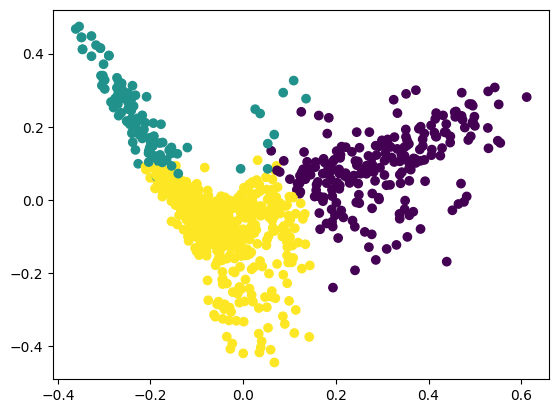

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.scatter(pca_x[indices][:,0],pca_x[indices][:,1],c=labels )
plt.show()


In [ ]:
from sklearn.manifold import TSNE

tsne_x = TSNE(n_components=2, learning_rate='auto',init='random',).fit_transform(X)

In [ ]:
plt.scatter(tsne_x[indices][:,0],tsne_x[indices][:,1],c=labels )
plt.show()

In [ ]:
fakeNews['text'][indices[0]]

'Insane! This really is the definition of insanity. Letting  non-citizens  vote in our elections is something no other country would even consider ever! When you elect a socialist radical as mayor then I guess that s what you get New York City lawmakers and Mayor Bill de Blasio are reportedly discussing legislation that would give voting rights to non-citizens in local elections. The Guardian noted that under the legislation that is being discussed,  legally documented residents who have lived in New York City for at least six months will be able to vote in municipal elections.  Lawmakers are reportedly  discussing the legislation with Mayor Bill de Blasio s office  and  a bill might be introduced as soon as this spring.  Two years ago, city councilman Daniel Dromm  won the support of 35 of the city council s 51 members, forming a veto-proof majority  when he tried to advance the non-citizen voting bill,  but he faced the obstruction of then council speaker Christine Quinn and the unbr

In [ ]:
fakeNews['text'][indices[6]]

'The Chairman of the Duma Committee on financial market Anatoly Aksakov said that Russia has long been adapted to the sanctions decisions of foreign States and it\'s not sensitive to these decisions. He emphasized that "sanctions are stupid" and Russia should deepen the cooperation with China, India, North and South Korea, Japan.'

In [ ]:
fakeNews['text'][indices[1]]

'The presidential debate schedule is already out, and, true to form, Donald Trump is already throwing a livid fit about it. He doesn t like the fact that two of the debates are scheduled on the same nights as NFL games, which would be understandable if he wasn t busy saying Hillary Clinton is responsible for that. However, he crossed a major line in his accusations, and it has already come back to bite him hard.In an interview with ABC News, he made the following ridiculous claim: Well, I ll tell you what I don t like. It s against two NFL games. I got a letter from the NFL saying,  This is ridiculous. Why are the debates against   cause the NFL doesn t wanna go against the debates.  Cause the debates are gonna be pretty massive, from what I understand, OK? And I don t think we should be against the NFL. Now, aside from the obvious questions of why the NFL would be sending Trump a letter about this, rather than the Commission on Presidential Debates, it appears that this is one of Trum

In [ ]:
fakeNews['text'][indices[2]]

'Giddy with the news that an Egyptian commercial airplane had disappeared on route from France to Cairo, Donald Trump wasted no time in taking an undeserved victory lap for his proposal to ban Muslims from the United States. Unable to contain himself, he also went a step further and blamed Hillary Clinton for the plane s disappearance   because why not?Immediately after announcing that he was positive the plane went down due to Islamic terrorism (a conclusion he came to before even a single fact had emerged), Trump released a breathless statement to the effect that Clinton s lack of support for a Muslim ban was the root of all international terrorism. His evidence: a list of acts of terror that had occurred both before she became Secretary of State and after she left.Look at the carnage all over the world including the World Trade Center, San Bernardino, Paris, the USS Cole, Brussels and an unlimited number of other places. She and our totally ignorant President won t even use the term

In [ ]:
trueNews = pd.read_csv('/content/gdrive/MyDrive/Canis/DataSet_Misinfo_TRUE.csv')
fakeNews = pd.read_csv('/content/gdrive/MyDrive/Canis/DataSet_Misinfo_FAKE.csv')
russianNews =  pd.read_csv('/content/gdrive/MyDrive/Canis/EXTRA_RussianPropagandaSubset.csv')

In [ ]:
def cleanText(text):
  text = " ".join([word for word in text.split() if word not in (stop)])
  return text

trueNews['cleantext']=trueNews['text'].apply(lambda x: cleanText(str(x)))
fakeNews['cleantext']=fakeNews['text'].apply(lambda x: cleanText(str(x)))

In [ ]:
corpus = fakeNews['cleantext']

In [ ]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))
['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']
# Download the "glove-twitter-25" embeddings
glove_vectors = gensim.downloader.load('glove-twitter-25')

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import gensim
from gensim.models import Word2Vec

import nltk
nltk.download('punkt')
 

data = []

for i in (corpus):
    # tokenize the sentence into words
    data.append(i.split())
 

 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data[0]

In [ ]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1,vector_size = 200, window = 5,workers=-1)
 
# Create Skip Gram model
#model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 200,window = 5, sg = 1)

In [ ]:
model1.wv.most_similar('russia')

[('russians', 0.7159169912338257),
 ('russian', 0.6974749565124512),
 ('moscow', 0.675204873085022),
 ('kremlin', 0.6641848087310791),
 ('russias', 0.6555510759353638),
 ('putin', 0.6224039793014526),
 ('ukraine', 0.5752823948860168),
 ('nato', 0.5641341805458069),
 ('china', 0.5348485708236694),
 ('rootcause', 0.520883321762085)]

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]
model = Doc2Vec(documents, vector_size=500, window=10, min_count=1, workers=-1)

In [ ]:
X=model.dv.vectors

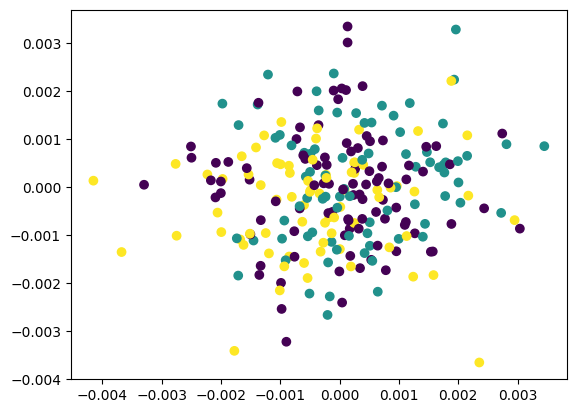

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
pca = PCA(n_components=2)
pca_x = pca.fit_transform(X)
indices = np.random.choice(X.shape[0], 250, replace=False)
labels = kmeans.predict(X[indices])


plt.scatter(pca_x[indices][:,0],pca_x[indices][:,1],c=labels )
plt.show()

In [ ]:
indicesTrue = np.random.choice(trueNews['cleantext'].values.shape[0], 5000, replace=False)
indicesFake = np.random.choice(fakeNews['cleantext'].values.shape[0], 5000, replace=False)
sampleTrueNews = trueNews['cleantext'].values[indicesTrue]
sampleFakeNews = fakeNews['cleantext'].values[indicesFake]



(10,)

In [ ]:
sampleDf = pd.DataFrame()
sampleDf['news'] = np.concatenate((sampleTrueNews, sampleFakeNews), axis=0)
sampleDf['label'] = np.concatenate((np.ones(5000), np.zeros(5000)), axis=0)

In [ ]:
sampleDf.head()

,news,label
0,cnn anchor jake tapper reacted chief strategis...,1.0
1,chairman senate intelligence committee thursda...,1.0
2,russian foreign minister sergei lavrov visit w...,1.0
3,hong kong president obama friday moved block c...,1.0
4,queen elizabeth invite us presidentelect donal...,1.0


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


In [ ]:
vectorizer = CountVectorizer(max_features=100)
X = vectorizer.fit_transform(sampleDf['news'],).toarray()

In [ ]:
sampleDf['news'][0]

'cnn anchor jake tapper reacted chief strategist senior counselor steve bannons statement media embarrassed humiliated keep mouth shut listen awhile ha tapper reminder presidents top aide told new york times press keep mouth shut ha mediaite follow breitbart tv twitter breitbartvideo'

In [ ]:
vectorizer.transform([sampleDf['news'].values[0]]).toarray().shape

(1, 100)

In [ ]:
rForest = RandomForestClassifier()
rForest.fit(X, sampleDf['label'])

RandomForestClassifier()

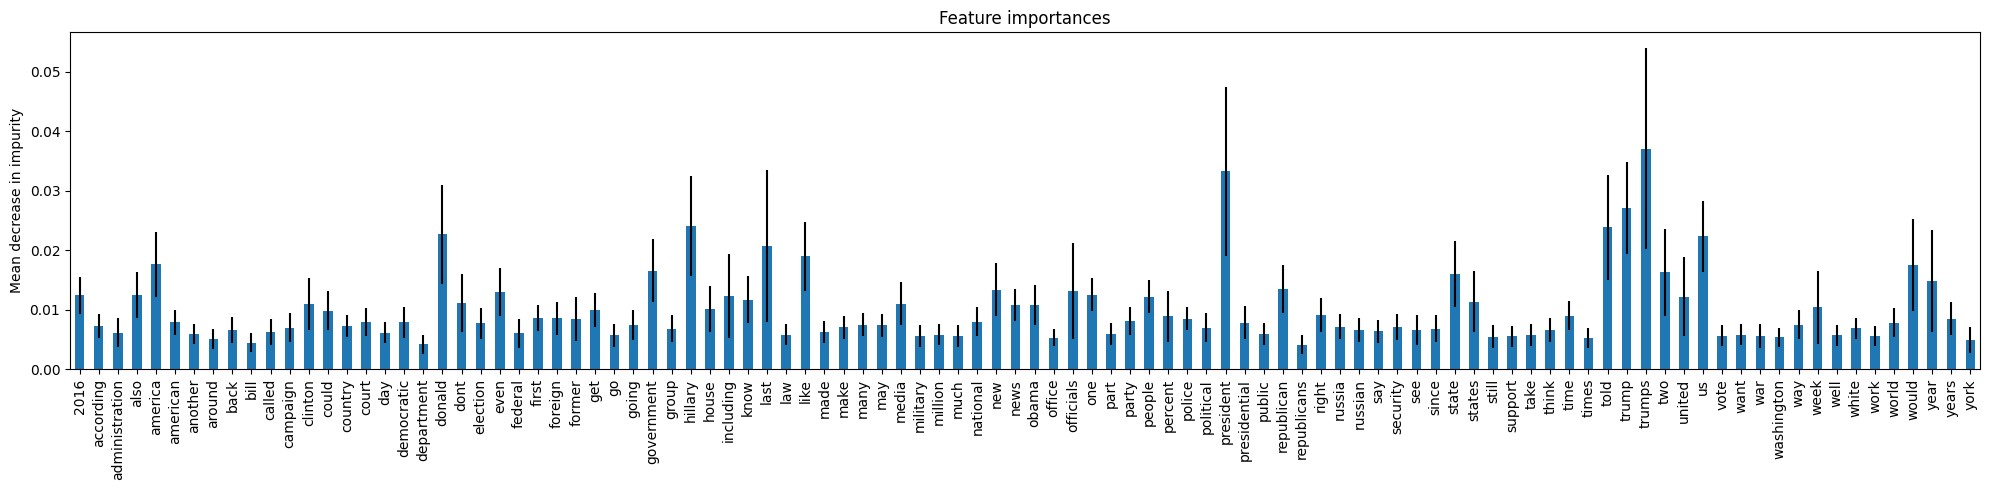

In [ ]:

feature_names = [featureName for featureName in vectorizer.get_feature_names_out()]

importances = rForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rForest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(20, 5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



In [ ]:
forest_importances.sort_values(ascending=False)[:10]

trumps       0.037109
president    0.033259
trump        0.027119
hillary      0.024031
told         0.023870
donald       0.022681
us           0.022352
last         0.020759
like         0.018954
america      0.017622
dtype: float64